In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv(r"C:\Users\admin\Downloads\Advertising.csv")

In [7]:
data.head(15)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [9]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
data['total'] = data['TV']+ data['radio']+data['newspaper']
data

,TV,radio,newspaper,sales,total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


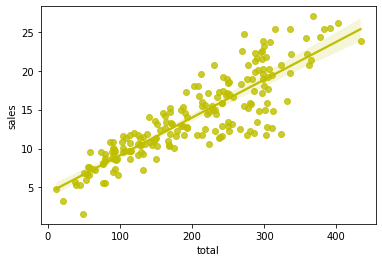

In [45]:
sns.regplot(x = 'total', y='sales', data=data, color='y',ci=99)


In [49]:
X = data['total']
y = data['sales']
poly = np.polyfit(X,y,1)

In [50]:
potential_spend = np.linspace(0,500,100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

## Predict sales at any spend:

In [58]:
N = float(input("Enter your spend: "))
predicted_sales = poly[0]*N+poly[1]
print("Predicted sale is ",predicted_sales.round(3))

Enter your spend: 200.5
Predicted sale is  14.005


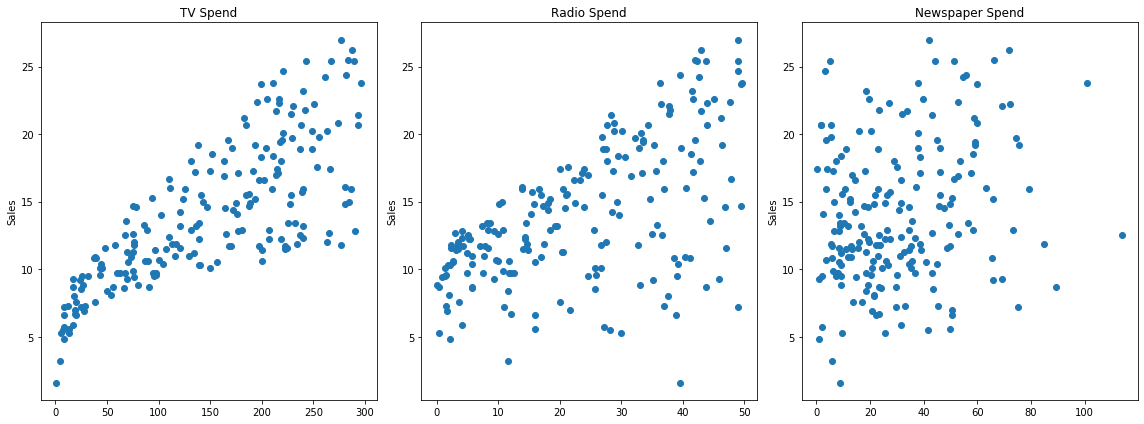

In [61]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(data['TV'],data['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")
axes[1].plot(data['radio'],data['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")
axes[2].plot(data['newspaper'],data['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

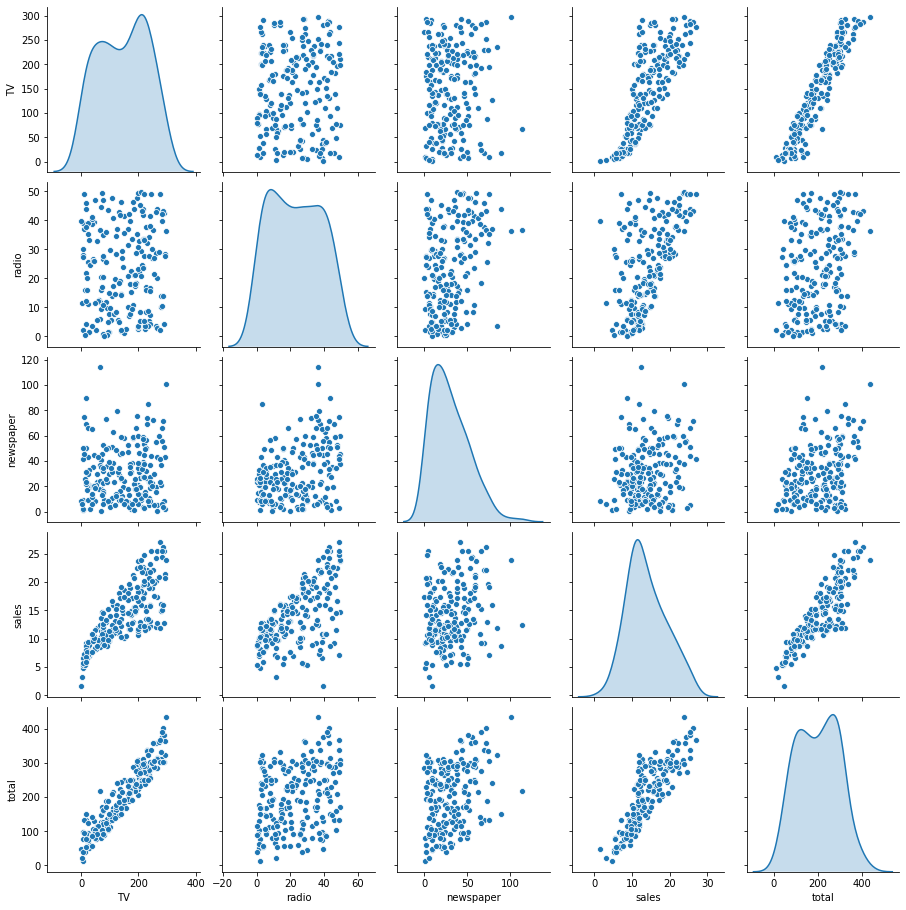

In [59]:
sns.pairplot(data, diag_kind = 'kde')

## Cleaning for Regression

In [65]:
data.drop('total', axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [66]:
X = data.drop('sales', axis=1)

In [67]:
y = data['sales']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [81]:
X_test.head(10)

,TV,radio,newspaper,total
95,163.3,31.6,52.9,247.8
15,195.4,47.7,52.9,296.0
30,292.9,28.3,43.2,364.4
158,11.7,36.9,45.2,93.8
128,220.3,49.0,3.2,272.5
115,75.1,35.0,52.7,162.8
69,216.8,43.9,27.2,287.9
170,50.0,11.6,18.4,80.0
174,222.4,3.4,13.1,238.9
45,175.1,22.5,31.5,229.1


## Prediction

In [78]:
model = LinearRegression()

In [79]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
test_predictions = model.predict(X_test)
test_predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [86]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

print ('Mean absolute error', MAE)
print ('Mean squared error',MSE)
print ('SQRT MAE',RMSE)


Mean absolute error 1.5116692224549086
Mean squared error 3.796797236715223
SQRT MAE 1.9485372043446394


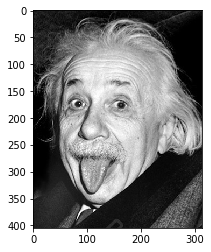

In [100]:
from PIL import Image
ein = Image.open(r'C:\Users\admin\Desktop\einstein.jpg')
plt.imshow(ein)
plt.show()
 


(405, 314, 3)
(405, 314)


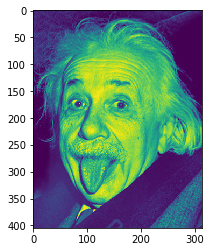

In [101]:
# SVD is defined on 2D matrices
print( np.shape(ein) )
ein = np.mean(ein,2)
print( np.shape(ein) )
plt.imshow(ein)
plt.show()

In [102]:
U, s, V=np.linalg.svd(ein)
print(np.shape(U))
print(np.shape(s))
print(np.shape(V))

(405, 405)
(314,)
(314, 314)


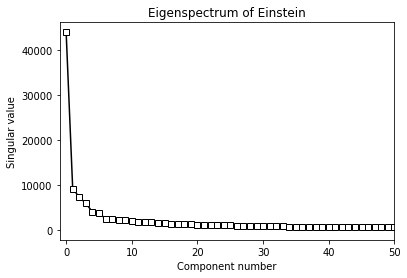

In [103]:
# plot the eigenspectrum
# we use the corresponding format string 'ks--' where k denotes a black line, s a square marker and -- a dashed line:
plt.plot(s,'ks-',markerfacecolor='w')
plt.xlim([-1,50])
plt.xlabel('Component number')
plt.ylabel('Singular value')
plt.title('Eigenspectrum of Einstein')
plt.show()